%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
[{'window': 0, 'w': 385, 'h': 161}, {'window': 1, 'w': 38, 'h': 167}, {'window': 2, 'w': 38, 'h': 123}, {'window': 3, 'w': 178, 'h': 140}, {'window': 4, 'w': 326, 'h': 90}, {'window': 5, 'w': 290, 'h': 83}, {'window': 6, 'w': 389, 'h': 47}, {'window': 7, 'w': 236, 'h': 86}, {'window': 8, 'w': 171, 'h': 156}, {'window': 9, 'w': 111, 'h': 100}]

packed blocks: [{'window': 0, 'w': 385, 'h': 161, 'fit': {'x': 447.5, 'y': 279.5}}, {'window': 4, 'w': 326, 'h': 90, 'fit': {'x': 110.0, 'y': 341.0}}, {'window': 8, 'w': 171, 'h': 156, 'fit': {'x': 936.5, 'y': 293.0}}, {'window': 3, 'w': 178, 'h': 140, 'fit': {'x': 264.0, 'y': 168.0}}, {'window': 5, 'w': 290, 'h': 83, 'fit': {'x': 730.0, 'y': 185.5}}, {'window': 7, 'w': 236, 'h': 86, 'fit': {'x': 681.0, 'y': 463.0}}, {'window': 6, 'w': 389, 'h': 47, 'fit': {'x': 87.5, 'y': 442.5}}, {'window': 9, 'w': 111, 

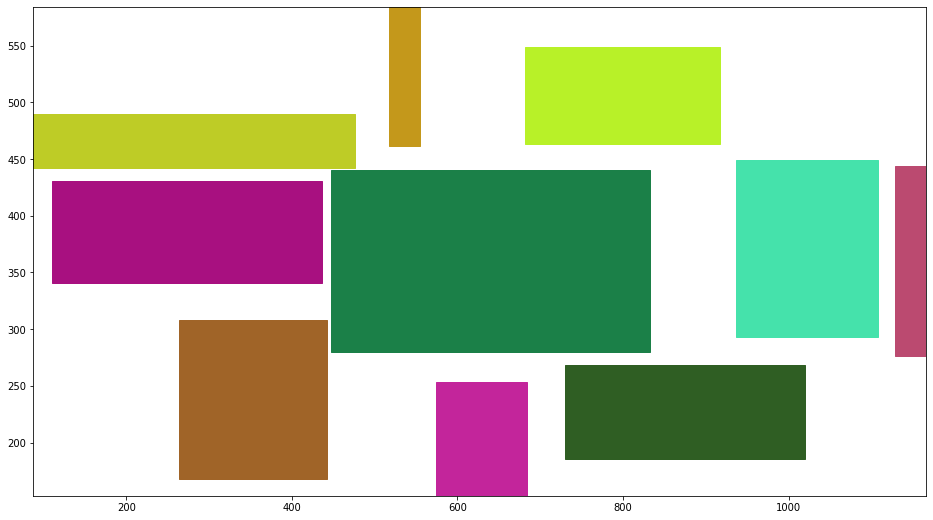

In [28]:
%pylab inline
import math
import random
from glass_input.cloud_packer import CloudPacker

IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
MARGIN = 0.1

def generate_random_windows(number_windows = 10):
   windows = []

   for n in range(number_windows):
      windows.append({"window": n,
                      "w": random.randint(0, math.floor(IMAGE_WIDTH / 3)),
                      "h": random.randint(0, math.floor(IMAGE_HEIGHT / 4))})

   return windows

def cloud_packer_test(view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN):
   cloud_packer_test_blocks(generate_random_windows(), view_width=view_width, view_height=view_height, margin=margin)

def cloud_packer_test_blocks(blocks, view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN):
   print(f"{blocks}\n")
   packer = CloudPacker()
   maxw = max([shape["w"] for shape in blocks])
   maxh = max([shape["h"] for shape in blocks])
   
   blocks = packer.fit(blocks, view_width=view_width, view_height=view_height, margin=margin * maxw)
   print(f"packed blocks: {blocks}\n")

   plt.figure(figsize=(16, 9))
   ax = plt.gca()
   minx = maxx = blocks[0]["fit"]["x"]
   miny = maxy = blocks[0]["fit"]["y"]
   for shape in blocks:
      color = "#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
      print(f"shape: {shape}")
      ax.add_patch(
          Rectangle(
              (shape["fit"]["x"], shape["fit"]["y"]),
              shape["w"], shape["h"],
              color=color))
      if shape["fit"]["x"] < minx: minx = shape["fit"]["x"]
      if shape["fit"]["x"] + shape["w"] > maxx: maxx = shape["fit"]["x"] + shape["w"]
      if shape["fit"]["y"] < miny: miny = shape["fit"]["y"]
      if shape["fit"]["y"] + shape["h"] > maxy: maxy = shape["fit"]["y"] + shape["h"]

   plt.ylim(miny, maxy)
   plt.xlim(minx, maxx)
        
   plt.show()

cloud_packer_test()


[{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}]

packed blocks: [{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070, 'fit': {'x': -0.3279687559604645, 'y': -0.18890626192092896}}, {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116, 'fit': {'x': 1.6720312440395355, 'y': 0.811093738079071}}, {'w': 0.5278125, 'h': 0.410625, 'window': 20971652, 'fit': {'x': -3.26390625, 'y': 1.7946875}}]

shape: {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070, 'fit': {'x': -0.3279687559604645, 'y': -0.18890626192092896}}
shape: {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116, 'fit': {'x': 1.6720312440395355, 'y': 0.811093738079071}}
shape: {'w': 0.5278125, 'h': 0.410625, 'window': 20971652, 'fit': {'x': -3.26390625, 'y': 1.7946875}}


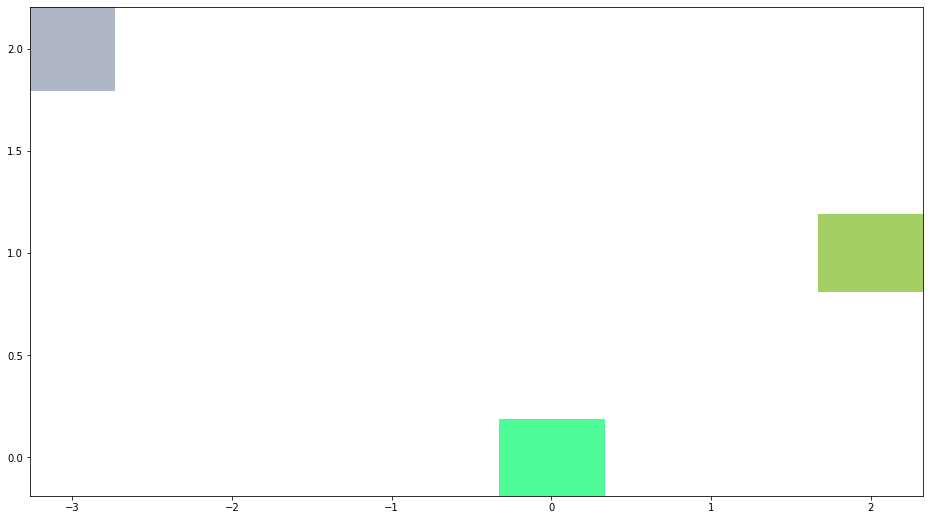

In [26]:
cloud_packer_test_blocks([{'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680070},
  {'w': 0.655937511920929, 'h': 0.37781252384185793, 'window': 14680116},
  {'w': 0.5278125, 'h': 0.410625, 'window': 20971652}], view_width=1.0, view_height=0.6000000238418579)